<a href="https://colab.research.google.com/github/parimalakettymuthu/MachineLearning-Projects/blob/main/MultiLabel_Classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys 
#sys.path.append('/content/drive/MyDrive/NLP/custom-functions')

In [3]:
import pandas as pd
from pathlib import Path
import joblib
# Importing the necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.vocab import  vocab

import random
import numpy as np
import pandas as pd
import joblib
from collections import Counter


from pathlib import Path
import sys

from sklearn.model_selection import train_test_split
!pip install wandb -qq
import wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.6 MB/s eta 0:00:00


In [4]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')   
  base_path = '/content/drive/MyDrive/NLP'
  sys.path.append('/content/drive/MyDrive/NLP/user-defined-fns')
  sys.path.append('/content/drive/MyDrive/NLP/user-defined-fn')
  sys.path.append('/content/drive/MyDrive/NLP/user-defined')

Mounted at /content/drive


In [5]:
base_folder = Path(base_path)
assignment_fldr = base_folder/ 'assignment6'
custom_fldr = base_folder/ 'user-defined-fn'

#Check contents in data folder
for entries in custom_fldr.iterdir():
  print(entries.name)

data_preparation_imdb_rev0.py
.ipynb_checkpoints
__pycache__


In [6]:
#sys.path.append('/content/drive/MyDrive/NLP/custom-functions')
sys.path = list(set(sys.path))

In [7]:
sys.path

['',
 '/root/.ipython',
 '/usr/local/lib/python3.9/dist-packages',
 '/content/drive/MyDrive/NLP/user-defined',
 '/usr/lib/python3.9/lib-dynload',
 '/env/python',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python39.zip',
 '/content/drive/MyDrive/NLP/user-defined-fns',
 '/usr/local/lib/python3.9/dist-packages/IPython/extensions',
 '/content/drive/MyDrive/NLP/user-defined-fn',
 '/usr/lib/python3.9',
 '/content']

In [8]:
!pip install torchmetrics -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 27.8 MB/s eta 0:00:00


In [9]:
from Trainer_v2 import Trainer
from ff_3_layer_sequential_model import MLPCustom

In [10]:
from data_preparation_imdb_rev0 import *

In [11]:
df_multilable_data = assignment_fldr/ 'df_multilabel_hw_cleaned.joblib'
multiLabel_Data = joblib.load(df_multilable_data)

In [12]:
multiLabel_Data.columns

Index(['cleaned_text', 'Tags', 'Tag_Number'], dtype='object')

In [13]:
multiLabel_Data.shape

(47427, 3)

In [14]:
import ast
# assume 'df' is your pandas DataFrame
multiLabel_Data['Tag_Number'] = multiLabel_Data['Tag_Number'].apply(lambda x: [int(i) for i in ast.literal_eval(x)])

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer

# assume 'labels' is your list of labels (i.e., 'Tag_Number' column after conversion to integers)
mlb = MultiLabelBinarizer()
one_hot_labels= mlb.fit_transform(multiLabel_Data['Tag_Number'])
for i in range(len(mlb.classes_)):
    multiLabel_Data[f"one_hot_{mlb.classes_[i]}"] = one_hot_labels[:, i]

In [16]:
multiLabel_Data.columns

Index(['cleaned_text', 'Tags', 'Tag_Number', 'one_hot_0', 'one_hot_1',
       'one_hot_2', 'one_hot_3', 'one_hot_4', 'one_hot_5', 'one_hot_6',
       'one_hot_7', 'one_hot_8', 'one_hot_9'],
      dtype='object')

In [17]:
#multiLabel_Data['Tag_Number_encoded']

In [18]:
#multiLabel_Data['Tag_Number_encoded'].shape


In [19]:
X_final = multiLabel_Data['cleaned_text'].values

In [20]:
y_final = multiLabel_Data.loc[:, 'one_hot_0':'one_hot_9'].values
unique_labels = np.unique(y_final)
print(unique_labels)

[0 1]


In [21]:
print(type(y_final), y_final.shape)

<class 'numpy.ndarray'> (47427, 10)


#Create Train/Test/Valid Split

In [22]:
#X_train, x_valid_test, y_train, y_valid_test = train_test_split(X_final, y_final, test_size = 0.4, stratify = y_final)
X_train, x_valid_test, y_train, y_valid_test = train_test_split(X_final, y_final, test_size = 0.4)

In [23]:
#X_valid, X_test, y_valid, y_test = train_test_split(x_valid_test, y_valid_test, test_size = 0.5, stratify = y_valid_test)
X_valid, X_test, y_valid, y_test = train_test_split(x_valid_test, y_valid_test, test_size = 0.5)

In [24]:
print("Train set shape: ", X_train.shape, "Split %: ", len(X_train)/len(X_final))
print("Validation set shape: ", X_valid.shape,"Split %: ", len(X_valid)/len(X_final))
print("Test set shape: ", X_test.shape, "Split %: ", len(X_test)/len(X_final))

Train set shape:  (28456,) Split %:  0.59999578299281
Validation set shape:  (9485,) Split %:  0.19999156598562
Test set shape:  (9486,) Split %:  0.20001265102156998


In [25]:
trainset = CustomDataset(X_train,y_train)
validset = CustomDataset(X_valid,y_valid)
testset = CustomDataset(X_test,y_test)

In [26]:
print(np.unique(y_train), np.unique(y_valid), np.unique(y_test))

[0 1] [0 1] [0 1]


#Create vocab

In [27]:
multilabel_vocab = get_vocab(trainset, min_freq=2)

In [28]:
len(multilabel_vocab)

89552

In [29]:
valid_multilabel_vocab = get_vocab(validset, min_freq=2)

#Meta Data

In [30]:
from types import SimpleNamespace

hyperparameters = SimpleNamespace(
    # model Parameters
    EMBED_DIM=300,
    VOCAB_SIZE=len(multilabel_vocab),
    OUTPUT_DIM=10,
    HIDDEN_DIM1=200,
    HIDDEN_DIM2=100,
    NON_LINEARITY=F.relu,
    
    # training 
    EPOCHS=5,
    BATCH_SIZE=128,
    LEARNING_RATE=0.001,
    WEIGHT_DECAY=0.000,
    CLIP_TYPE = 'value',
    CLIP_VALUE = 10,
    PATIENCE=5,
    MOMENTUM=0,  
)

#Trainer Configuration

In [31]:
'''def collate_batch_multilabel(batch, vocab, num_classes):
    labels, texts = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.float32)
    #labels = torch.tensor(labels, dtype=torch.float32).to(torch.float32)
    labels = torch.nn.functional.one_hot(labels.to(torch.int64), num_classes=num_classes)

    list_of_list_of_indices = [text_pipeline(text, vocab) for text in texts]

    offsets = [0] + [len(i) for i in list_of_list_of_indices]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    texts = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

    return (texts, offsets), labels.to(torch.float32)'''

'def collate_batch_multilabel(batch, vocab, num_classes):\n    labels, texts = zip(*batch)\n    labels = torch.tensor(labels, dtype=torch.float32)\n    #labels = torch.tensor(labels, dtype=torch.float32).to(torch.float32)\n    labels = torch.nn.functional.one_hot(labels.to(torch.int64), num_classes=num_classes)\n\n    list_of_list_of_indices = [text_pipeline(text, vocab) for text in texts]\n\n    offsets = [0] + [len(i) for i in list_of_list_of_indices]\n    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)\n    texts = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])\n\n    return (texts, offsets), labels.to(torch.float32)'

In [32]:
def collate_batch_multilabel(batch, vocab):
    labels, texts = zip(*batch)
    labels = torch.tensor(labels, dtype=torch.float32)
    list_of_list_of_indices = [text_pipeline(text, vocab) for text in texts]
    offsets = [0] + [len(i) for i in list_of_list_of_indices]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    texts = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])
    return (texts, offsets), labels

In [33]:
from functools import partial
# Fix seed value
Trainer.set_seed()

collate_fn = partial(collate_batch_multilabel, vocab=multilabel_vocab)
#train_loader = torch.utils.data.DataLoader(dataset=trainset,
                                           #batch_size=hyperparameters.BATCH_SIZE,
                                           #collate_fn=collate_fn,
                                           #shuffle=True)
#collate_fn = partial(collate_batch_multilabel, vocab=valid_multilabel_vocab)
#valid_loader = torch.utils.data.DataLoader(dataset=validset,
 #                                          batch_size=hyperparameters.BATCH_SIZE,
  #                                         collate_fn=lambda batch: collate_batch_multilabel(batch, valid_multilabel_vocab),
   #                                        shuffle=False)
#valid_loader = torch.utils.data.DataLoader(dataset=validset,
                                          # batch_size=hyperparameters.BATCH_SIZE,
                                          # collate_fn=collate_fn,
                                          # shuffle=True)

# Data Loader
train_loader, valid_loader = get_loaders(trainset, validset, batch_size_= hyperparameters.BATCH_SIZE, 
                                         collate_fn=collate_fn)

# cross entropy loss function
#loss_function = nn.CrossEntropyLoss()
loss_function = torch.nn.BCEWithLogitsLoss()
# model
model_imdb = MLPCustom(hyperparameters.EMBED_DIM,
                       hyperparameters.VOCAB_SIZE,
                       hyperparameters.HIDDEN_DIM1,
                       hyperparameters.HIDDEN_DIM2,
                       hyperparameters.OUTPUT_DIM,
                       hyperparameters.NON_LINEARITY)

def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.kaiming_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)


# apply initialization recursively  to all modules
model_imdb.apply(init_weights)

# Intialize stochiastic gradient descent optimizer
optimizer = torch.optim.Adam(model_imdb.parameters(),
                             lr=hyperparameters.LEARNING_RATE,
                             weight_decay=hyperparameters.WEIGHT_DECAY,
                             )
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [34]:
#print(train_loader.shape, train_loader.shape)
for (texts, offsets), labels in valid_loader:
  print(labels, texts, offsets)
  break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 1.]]) tensor([ 243,    0,  527,  ..., 1082,  239,  768]) tensor([   0,  414,  439,  455,  560,  576,  622,  655,  706,  732,  776,  821,
         878,  979, 1011, 1053, 1075, 1277, 1628, 1661, 1728, 1871, 1979, 2012,
        2072, 2097, 2208, 2286, 2395, 2493, 2593, 2668, 2762, 2930, 2952, 2992,
        3007, 3044, 3097, 3367, 3440, 3477, 3544, 3575, 3659, 3682, 3739, 3769,
        3847, 3919, 3981, 4072, 4097, 4132, 4287, 4314, 4333, 4401, 4421, 4770,
        4842, 4900, 4944, 5003, 5038, 5085, 5140, 5251, 5277, 5328, 5340, 5564,
        5578, 5637, 5670, 5685, 5732, 5776, 5804, 5879, 5892, 5929, 5966, 6038,
        6102, 6229, 6296, 6349, 6370, 6608, 6730, 6949, 6978, 7043, 7055, 7111,
        7165, 7188, 7225, 7264, 7306, 7361, 7431, 7501,

<ipython-input-32-0afa194fa4de>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  labels = torch.tensor(labels, dtype=torch.float32)


#Training Model

In [35]:
trainer = Trainer(model=model_imdb, optimizer=optimizer,
                  criterion=loss_function, device=device)

In [36]:
#from torchmetrics.classification import Accuracy
from torchmetrics.classification import MultilabelHammingDistance
run_folder = assignment_fldr/'rev2'
run_folder.mkdir(exist_ok=True)

# set loaders
trainer.set_loaders(train_loader, valid_loader)

# set metric -- OPTIONAL
train_metric = MultilabelHammingDistance(mode='multilabel',task='multilabel', num_labels=10,compute_on_step=False)
valid_metric = MultilabelHammingDistance(mode='multilabel',task='multilabel', num_labels=10,compute_on_step=False)
trainer.set_metric(train_metric.to(device), valid_metric.to(device))

# set checkpoint -- OPTIONAL
trainer.set_checkpoint(save_path=run_folder,
                       save_best=True, save_every_n_epochs=1, save_last_epoch=False)

# set early stopping -- OPTIONAL
trainer.set_early_stopping(patience = hyperparameters.PATIENCE)

# set gradient Clipping  -- OPTIONAL
trainer.set_gradient_clipping(hyperparameters.CLIP_TYPE, hyperparameters.CLIP_VALUE, norm_type=2)

Add a brief description about the metric and why it is a good metric for multilabel classification problems.


Answer: MultilabelHammingDistance is a metric used for evaluating the performance of multilabel classification models. It calculates the proportion of labels that are incorrectly predicted by the model, i.e., the average number of labels that differ between the predicted and true labels across all samples. It takes into account the fact that each sample can have multiple labels, and penalizes the model for making incorrect predictions for each label independently. This is different from other metrics like accuracy, which only consider the overall percentage of correctly classified samples, without taking into account the number of labels each sample has. And robust to imbalanced classes, which is a common issue in multilabel classification problems where some labels might be more frequent than others. Because it considers the total number of label predictions rather than the number of correctly predicted labels, making it less sensitive to the distribution of the labels.

> Indented block



In [37]:
trainer.sanity_check(num_classes=2)

Actual loss: 0.7093979120254517
Expected Theoretical loss: 0.6931471805599453


In [38]:
trainer.train(num_epochs=hyperparameters.EPOCHS, multilabel=True)

Epoch 1/5 - Train Loss: 0.5620, Train Metric: 0.2622, Train Time: 0:00:03.270923
Epoch 1/5 - Val Loss: 0.2335, Val Metric: 0.0742, Val Time: 0:00:00.811598

Epoch 2/5 - Train Loss: 0.2326, Train Metric: 0.0830, Train Time: 0:00:03.227590
Epoch 2/5 - Val Loss: 0.1628, Val Metric: 0.0594, Val Time: 0:00:00.812545

Epoch 3/5 - Train Loss: 0.1754, Train Metric: 0.0628, Train Time: 0:00:03.162936
Epoch 3/5 - Val Loss: 0.1439, Val Metric: 0.0526, Val Time: 0:00:00.810027

Epoch 4/5 - Train Loss: 0.1484, Train Metric: 0.0531, Train Time: 0:00:03.203557
Epoch 4/5 - Val Loss: 0.1300, Val Metric: 0.0485, Val Time: 0:00:00.879370

Epoch 5/5 - Train Loss: 0.1310, Train Metric: 0.0469, Train Time: 0:00:03.320661
Epoch 5/5 - Val Loss: 0.1210, Val Metric: 0.0453, Val Time: 0:00:00.813868



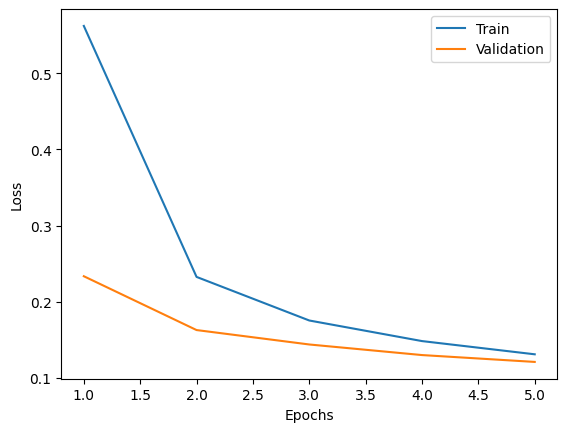

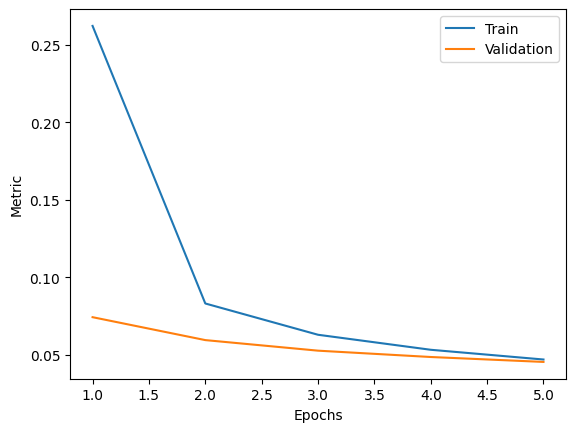

In [39]:
trainer.plot_history()

In [40]:
trainer.best_epoch

5

In [41]:
file = 'checkpoint_' + str(trainer.timestamp) + '_best.pt'
trainer.load_checkpoint(run_folder /file)

Loaded checkpoint from '/content/drive/MyDrive/NLP/assignment6/rev2/checkpoint_2023-04-10_01-52-31_best.pt'.


In [42]:
trainer.train(num_epochs=10, multilabel=True)

Epoch 1/10 - Train Loss: 0.1158, Train Metric: 0.0414, Train Time: 0:00:03.174735
Epoch 1/10 - Val Loss: 0.1137, Val Metric: 0.0420, Val Time: 0:00:00.806494

Epoch 2/10 - Train Loss: 0.1049, Train Metric: 0.0378, Train Time: 0:00:03.161365
Epoch 2/10 - Val Loss: 0.1101, Val Metric: 0.0406, Val Time: 0:00:00.796754

Epoch 3/10 - Train Loss: 0.0945, Train Metric: 0.0340, Train Time: 0:00:03.111044
Epoch 3/10 - Val Loss: 0.1060, Val Metric: 0.0387, Val Time: 0:00:00.813430

Epoch 4/10 - Train Loss: 0.0865, Train Metric: 0.0311, Train Time: 0:00:03.157670
Epoch 4/10 - Val Loss: 0.1041, Val Metric: 0.0371, Val Time: 0:00:00.805561

Epoch 5/10 - Train Loss: 0.0785, Train Metric: 0.0286, Train Time: 0:00:03.121945
Epoch 5/10 - Val Loss: 0.1018, Val Metric: 0.0359, Val Time: 0:00:00.801134

EarlyStopping counter: 1 out of 5
Epoch 6/10 - Train Loss: 0.0722, Train Metric: 0.0257, Train Time: 0:00:03.183127
Epoch 6/10 - Val Loss: 0.1030, Val Metric: 0.0355, Val Time: 0:00:00.807933

EarlyStoppin

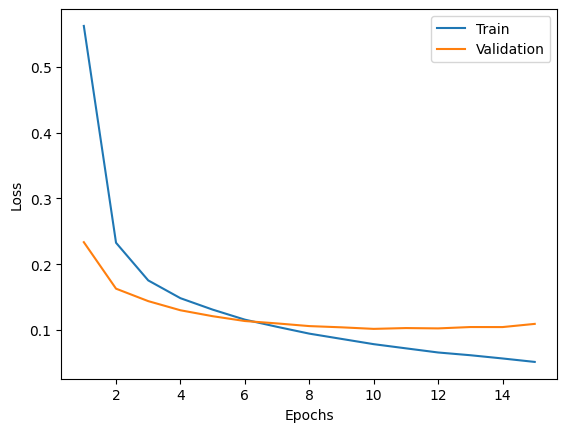

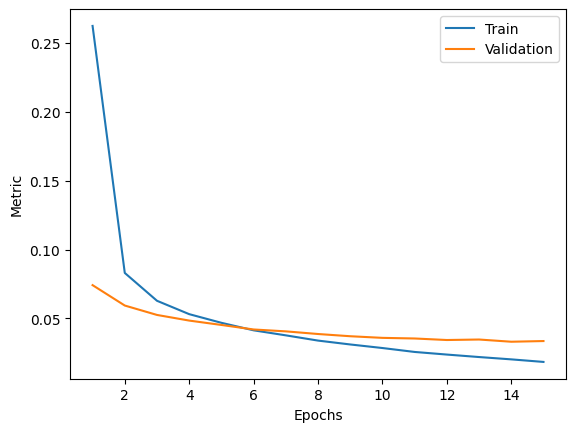

In [43]:
trainer.plot_history()

In [44]:
trainer.best_epoch

9

#Get Accuracy, Predictions

In [45]:
testset = CustomDataset(X_test, y_test)

In [46]:
test_multilabel_vocab = get_vocab(testset, min_freq=2)

In [47]:
collate_fn = partial(collate_batch_multilabel, vocab=test_multilabel_vocab)
test_loader = get_test_loaders(testset, batch_size_=hyperparameters.BATCH_SIZE,
                               collate_fn=collate_fn)
#collate_fn = partial(collate_batch_multilabel, vocab=test_multilabel_vocab)
#test_loader = torch.utils.data.DataLoader(dataset=validset,
                                          # batch_size=hyperparameters.BATCH_SIZE,
                                           #collate_fn=collate_fn,
                                          # shuffle=False)
#test_loader = torch.utils.data.DataLoader(dataset=validset,
 #                                          batch_size=hyperparameters.BATCH_SIZE,
  #                                         collate_fn=lambda batch: collate_batch_multilabel(batch, test_multilabel_vocab),
   #                                        shuffle=True)

In [55]:
# Get the prediction and accuracy for the test dataset

predictions_train, target_train = trainer.predict(
    train_loader, multilabel=True, return_targets=True)
predictions_valid, target_valid = trainer.predict(
    valid_loader, multilabel=True, return_targets=True)
predictions_test, target_test = trainer.predict(
    test_loader, multilabel=True, return_targets=True)

In [56]:
print(target_train.shape, predictions_train.shape)
print(target_valid.shape, predictions_valid.shape)
print(target_test.shape, predictions_test.shape)

torch.Size([28456, 10]) torch.Size([28456, 10])
torch.Size([9485, 10]) torch.Size([9485, 10])
torch.Size([9486, 10]) torch.Size([9486, 10])


In [50]:
import torchmetrics

In [58]:
#from sklearn.metrics import accuracy_score, f1_score
from torchmetrics.functional.classification import multilabel_f1_score, multilabel_hamming_distance
num_classes = target_train.shape[-1]
f1_score_train = multilabel_f1_score(target_train, predictions_train, average='micro',num_labels=num_classes)
hamming_distance_train = multilabel_hamming_distance(target_train,predictions_train, num_labels=num_classes)
print("Train F1 Score: ",f1_score_train, " Train hamming distance: ", hamming_distance_train)

f1_score_valid = multilabel_f1_score(target_valid,predictions_valid, average='micro',num_labels=num_classes)
hamming_distance_valid = multilabel_hamming_distance(target_valid,predictions_valid, num_labels=num_classes)
print("Train F1 Score: ",f1_score_valid, " Train hamming distance: ", hamming_distance_valid)

f1_score_test = multilabel_f1_score(target_test,predictions_test, average='micro', num_labels=num_classes)
hamming_distance_test = multilabel_hamming_distance(target_test,predictions_test,num_labels=num_classes)
print("Test F1 Score: ",f1_score_test, " Test hamming distance: ", hamming_distance_test)

Train F1 Score:  tensor(0.9766)  Train hamming distance:  tensor(0.0097)


In [52]:
from torchmetrics.functional.classification import multilabel_f1_score, multilabel_hamming_distance
#num_classes = target_train.shape[-1]


multilabel_f1_score
threshold = 0.5
average='micro'
#binary_predictions_train = (predictions_train > threshold).int()
#binary_predictions_valid = (predictions_valid > threshold).int()
#binary_predictions_test = (predictions_test > threshold).int()
#import torch.nn.functional as F

num_classes = target_train.shape[-1]
binary_target_train = torch.zeros(target_train.shape[0], num_classes, dtype=torch.float32)
binary_target_train.scatter_(1, torch.tensor(target_train, dtype=torch.int64), 1)
# compute binary predictions
binary_predictions_train = (predictions_train > threshold).int()
#print("Train binary predictions: ", binary_predictions_train.shape)
print("Train binary targets: ", binary_target_train.shape)
print("Train binary predictions: ", binary_predictions_train.shape)
f1_score_train = f1_score(binary_target_train, binary_predictions_train, average='micro')
hamming_distance_train = multilabel_hamming_distance(binary_predictions_train, target_train, num_labels=num_classes)
print("Train F1 Score: ",f1_score_train, " Train hamming distance: ", hamming_distance_train)
#f1_score_train = multilabel_f1_score(binary_predictions_train, target_train,num_labels=num_classes, threshold=threshold, average=average)
f1_score_train = f1_score(binary_target_train, binary_predictions_train, average='micro')
hamming_distance_train = multilabel_hamming_distance(binary_predictions_train, target_train, num_labels=num_classes)
print("Train F1 Score: ",f1_score_train, " Train hamming distance: ", hamming_distance_train)

num_classes = target_valid.shape[-1]
binary_predictions_valid = F.one_hot(predictions_valid, num_classes=num_classes)
print("Valid binary predictions: ", binary_predictions_valid.shape)
f1_score_valid = multilabel_f1_score(binary_predictions_valid, target_valid, num_labels=num_classes, threshold=threshold, average=average)
hamming_distance_valid = multilabel_hamming_distance(binary_predictions_valid, target_valid, num_labels=num_classes)
print("Train F1 Score: ",f1_score_valid, " Train hamming distance: ", hamming_distance_valid)

num_classes = target_test.shape[-1]
binary_predictions_test = F.one_hot(predictions_test, num_classes=num_classes)
print("Test binary predictions: ", binary_predictions_test.shape)
f1_score_test = multilabel_f1_score(binary_predictions_test, target_test, num_labels=num_classes, threshold=threshold, average=average)
hamming_distance_test = multilabel_hamming_distance(binary_predictions_test, target_test, num_labels=num_classes)
print("Test F1 Score: ",f1_score_test, " Test hamming distance: ", hamming_distance_test)

# assuming y_true and y_pred are the ground truth and predicted labels, respectively
#f1_score = multilabel_f1_score(predictions_train, target_train, num_classes=num_classes, threshold=threshold, average=average)
#hamming_distance = multilabel_hamming_distance(predictions_train, target_train, num_labels=num_labels)

Train binary targets:  torch.Size([28456, 10])
Train binary predictions:  torch.Size([28456])


<ipython-input-52-68f2aa12e99d>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  binary_target_train.scatter_(1, torch.tensor(target_train, dtype=torch.int64), 1)


ValueError: ignored